# 01 — Exploratory Data Analysis (EDA)


## 1. Overview


This notebook performs an Exploratory Data Analysis (EDA) on the cleaned LISS panel dataset produced in Notebook 00.
The goal of this stage is to develop a clear understanding of the structure, quality, and statistical properties of the data before applying regime‑splitting, feature engineering, or modeling.

Specifically, this notebook aims to:

Inspect the dataset at a global level (shape, missingness, distributions)

Explore the behavior of numeric and categorical variables

Identify potential data quality issues (skewness, outliers, constant columns)

Examine correlations and multicollinearity

Understand the distribution of the target variable(s)

Generate insights that will guide the next steps in the pipeline

This EDA serves as a diagnostic layer: it helps validate the cleaning pipeline, informs feature selection, and ensures that the modeling process is grounded in a solid understanding of the underlying data.

In [4]:
import sys
import os

# Determine the project root (one level above the notebook directory)
project_root = os.path.abspath("..")

# Add project root to Python path so modules in /src can be imported
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)

# Build data directory path
data_dir = os.path.join(project_root, "data")
print("Data directory:", data_dir)


Project root added: C:\Users\shari\OneDrive\MSc Data Science and Society\Thesis_DSS_2026
Data directory: C:\Users\shari\OneDrive\MSc Data Science and Society\Thesis_DSS_2026\data


## 1. Imports

In [6]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# EDA helper functions
from src.eda import (
    basic_info,
    inspect_regime,
    run_full_eda,
    list_sorted_correlations,
    target_summary
)

# Display settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

sns.set_theme(style="whitegrid", palette="muted")


## 2. Load cleaned data

In [8]:
# Load datasets
df_clean = pd.read_parquet(os.path.join(data_dir, "clean", "df_clean.parquet"))

df_regime_a = pd.read_parquet(os.path.join(data_dir, "regimes", "regime_a.parquet"))
df_regime_b = pd.read_parquet(os.path.join(data_dir, "regimes", "regime_b.parquet"))
df_regime_c = pd.read_parquet(os.path.join(data_dir, "regimes", "regime_c.parquet"))



## 3. Basic dataset overview

In [10]:
eda_a = inspect_regime(df_regime_a, "Regime A")
eda_b = inspect_regime(df_regime_b, "Regime B")
eda_c = inspect_regime(df_regime_c, "Regime C")


===== Regime A Shape =====
(21367, 410)

===== Regime A Column Types =====
001     float64
003     float64
004     float64
005     float64
006     float64
008     float64
009     float64
011     float64
012     float64
013     float64
014     float64
015     float64
016     float64
017     float64
018     float64
019     float64
020     float64
021     float64
022     float64
023     float64
024     float64
025     float64
026     float64
027     float64
028     float64
030     float64
031     float64
032     float64
033     float64
034     float64
035     float64
036     float64
038     float64
039     float64
040     float64
042     float64
043     float64
044     float64
045     float64
046     float64
047     float64
049     float64
050     float64
051      object
052     float64
053     float64
055     float64
056     float64
057     float64
059     float64
060     float64
061     float64
062     float64
063     float64
064     float64
066     float64
067     float64
068      obj

In [11]:
eda_a_full = run_full_eda(df_regime_a, "Regime A")
eda_b_full = run_full_eda(df_regime_b, "Regime B")
eda_c_full = run_full_eda(df_regime_c, "Regime C")



===== Regime A Skewness =====
001       0.000000
003      -0.170243
004      -1.228625
005      -0.389638
006       4.865277
008      -0.474990
009       4.745579
011       1.888185
012       3.040319
013       7.001720
014       7.289657
015       3.648865
016       1.529587
017       5.382272
018       4.532857
019       1.774298
020       5.286654
021       2.008938
022       4.700443
023       4.830201
024       5.756746
025      10.166566
026       7.170585
027       5.617707
028       8.427968
030      -0.888759
031            NaN
032      -1.465626
033            NaN
034      -1.555735
035      -0.500145
036       4.559603
038      -0.917313
039      -0.906554
040       0.631351
042       5.400906
043       0.756968
044       2.194432
045       1.815219
046       0.751989
047       1.258358
049       0.088884
050       3.852117
052       5.768932
053            NaN
055      -1.226630
056      -0.682061
057       0.637161
059       5.855262
060       1.490873
061       2.348095


### 3.1 Correlation Pairs

In [13]:
# Correlation Pairs
corr_pairs_a = list_sorted_correlations(eda_a_full["correlation"], min_abs_corr=0.3)
corr_pairs_a

Feature_1 Feature_2  Correlation
18453       117       480     1.000000
18751       120       451    -1.000000
20380       133       476    -1.000000
26848       362       447     1.000000
18551       118       451    -1.000000
19952       130       476    -1.000000
30190       462       475     1.000000
18752       120       455     1.000000
26999       372       375     1.000000
7934        042       381    -1.000000
27001       372       382     1.000000
27000       372       376     1.000000
22807       315       363    -1.000000
18285       116       318     1.000000
7862        042       120    -1.000000
7706        040       381    -1.000000
18344       116       447    -1.000000
18345       116       449    -1.000000
18353       116       461    -1.000000
7634        040       120     1.000000
17167       106       363    -1.000000
18297       116       339     1.000000
22182       309       363     1.000000
27002       372       383     1.000000
18184       115       350     1.000000
18180       115       345     1.000000
23349       322       452    -1.000000
27010       372      year     1.000000
23350       322       454     1.000000
27009       372       405     1.000000
18183       115       349     1.000000
27008       372       404     1.000000
27007       372       402    -1.000000
12077       069       312    -1.000000
27006       372       399    -1.000000
8161        043       381    -1.000000
27005       372       393    -1.000000
22309       311       362     1.000000
27004       372       385     1.000000
8089        043       120    -1.000000
27003       372       384     1.000000
18357       116       469    -1.000000
20964       137       476     1.000000
20965       137       477     1.000000
7477        039       381    -1.000000
18549       118       449     1.000000
6583        034       376     1.000000
6582        034       375     1.000000
6581        034       372     1.000000
12307       070       379    -1.000000
18569       118       495     1.000000
23597       327       472    -1.000000
30019       457       529    -1.000000
6338        032       376     1.000000
6337        032       375     1.000000
6336        032       372     1.000000
23598       327       473    -1.000000
26963       369       481    -1.000000
23599       327       474     1.000000
16860       104       381     1.000000
18548       118       447     1.000000
23470       326       454    -1.000000
23469       326       452     1.000000
12119       069       379    -1.000000
12082       069       318     1.000000
8527        045       116     1.000000
20963       137       475    -1.000000
20962       137       473    -1.000000
20961       137       472     1.000000
23427       326       372    -1.000000
7248        038       381    -1.000000
7017        036       381    -1.000000
12150       069       444    -1.000000
7176        038       120    -1.000000
23428       326       375    -1.000000
20379       133       475    -1.000000
23429       326       376    -1.000000
26976       370       481     1.000000
18179       115       342     1.000000
8529        045       119     1.000000
8528        045       118    -1.000000
17590       109       363     1.000000
27030       376       405     1.000000
23163       319       376     1.000000
23162       319       375     1.000000
9904        055       379     1.000000
23161       319       372     1.000000
27029       376       404     1.000000
23107       318       511    -1.000000
9787        052       529    -1.000000
27028       376       402    -1.000000
27129       381       530    -1.000000
27027       376       399    -1.000000
23014       318       326    -1.000000
27026       376       393    -1.000000
27025       376       385     1.000000
9631        052       119    -1.000000
27031       376      year     1.000000
10172       056       475    -1.000000
9629        052       116     1.000000
27100       379       457     1.000000
27068       378       400   

### 3.2 Target Summary


Summary statistics for '127' in Regime A (2008–2013):
count    21367.000000
mean        30.070436
std         15.261000
min          0.000000
25%         20.000000
50%         32.000000
75%         40.000000
max        167.000000
Name: 127, dtype: float64

Total respondents: 21367
Valid 127: 21367
Missing 127: 0
Valid %: 100.00

Skewness: -0.10
Kurtosis: 0.86

Extreme values: 62


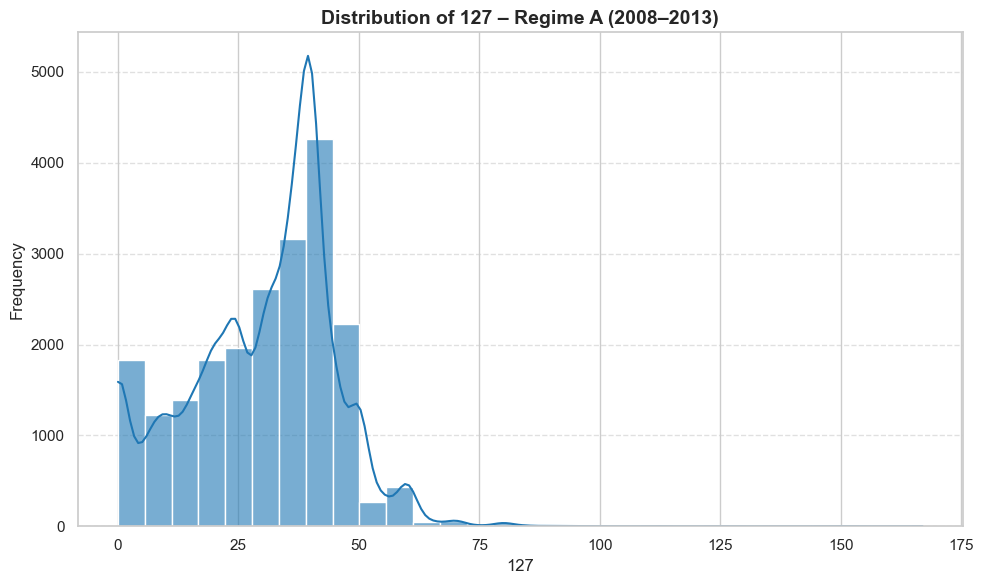


Summary statistics for '127' in Regime B (2014–2019):
count    19082.000000
mean        29.466094
std         15.670569
min          0.000000
25%         20.000000
50%         32.000000
75%         40.000000
max        168.000000
Name: 127, dtype: float64

Total respondents: 19082
Valid 127: 19082
Missing 127: 0
Valid %: 100.00

Skewness: -0.28
Kurtosis: 0.25

Extreme values: 40


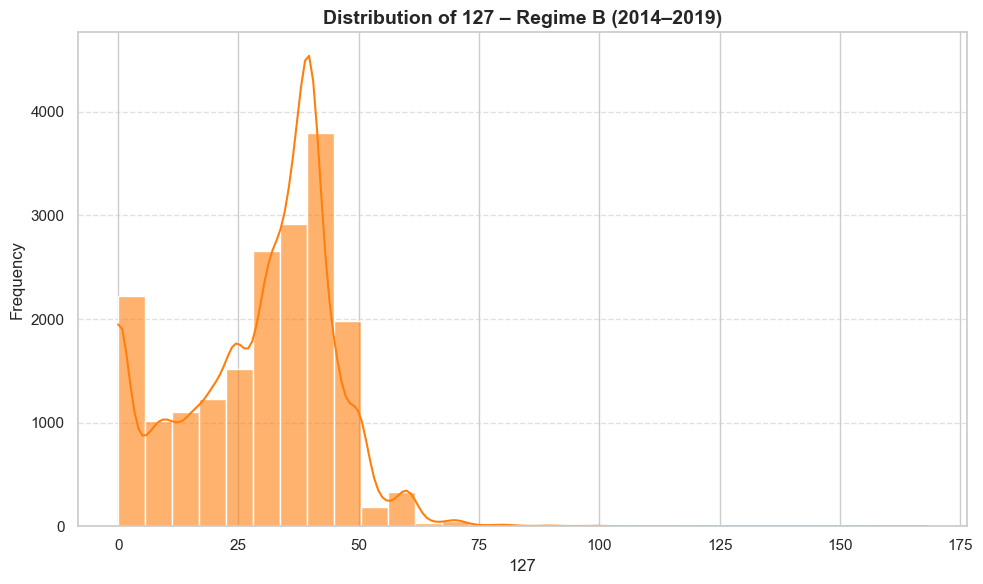


Summary statistics for '127' in Regime C (2020–2024):
count    15055.000000
mean        29.857855
std         14.576055
min          0.000000
25%         22.000000
50%         32.000000
75%         40.000000
max        160.000000
Name: 127, dtype: float64

Total respondents: 15055
Valid 127: 15055
Missing 127: 0
Valid %: 100.00

Skewness: -0.39
Kurtosis: 0.94

Extreme values: 62


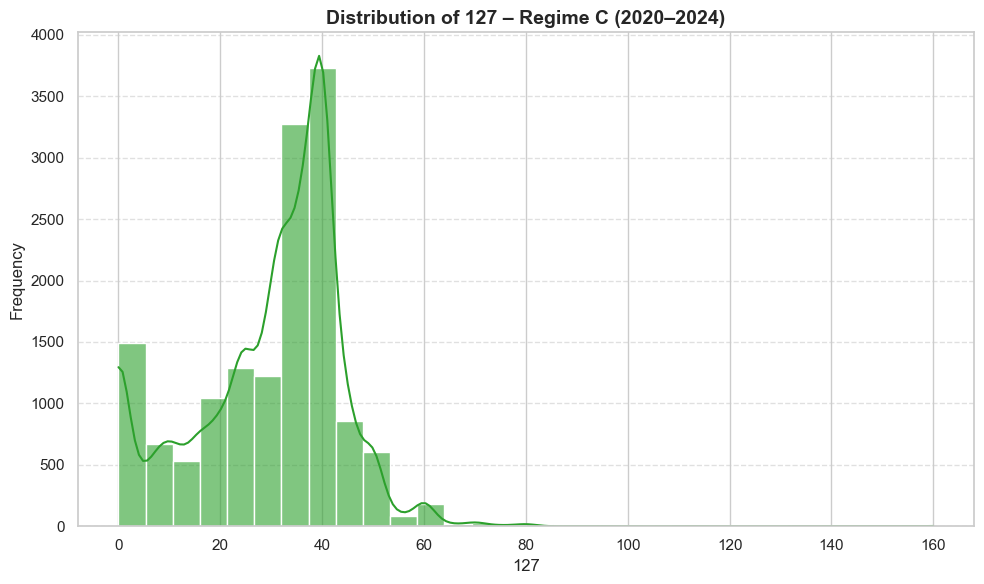

In [17]:
# Target Summary
target_summary(df_regime_a, "127", "Regime A (2008–2013)")
target_summary(df_regime_b, "127", "Regime B (2014–2019)")
target_summary(df_regime_c, "127", "Regime C (2020–2024)")